In [108]:
import numpy as np

# Parameters
mean1, std1 = 9, 7   # First normal distribution
mean2, std2 = 10, 3  # Second normal distribution
iterations = 10000   # Number of Monte Carlo iterations

In [109]:
np.random.seed(1)
critical1 = 0
critical2 = 0
i=0
critical_samples = []
while i< iterations:
    sample1 = np.random.normal(mean1, std1)
    sample2 = np.random.normal(mean2, std2)
    if sample1>sample2:
        critical1 = critical1 + 1
        critical_samples.append(sample1)
    else:
        critical2 = critical2 + 1
        critical_samples.append(sample2)
    i= i+1

In [110]:
critical1/iterations

0.4577

In [111]:
critical2/iterations

0.5423

In [112]:
np.mean(critical_samples)
# PERT mean estimate is 10 (Critiacl Path) -- You always underestimate PERT estimate.

12.6498661131455

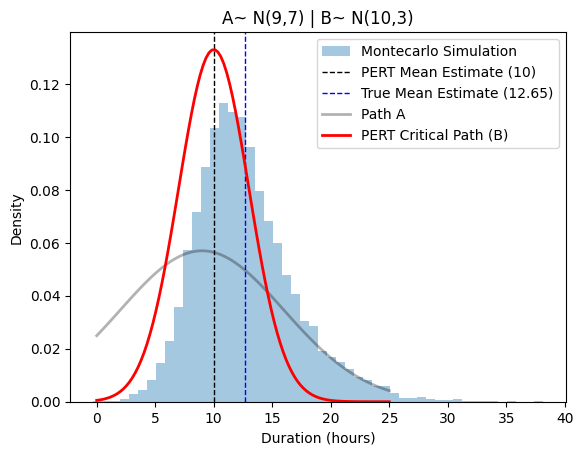

In [113]:
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(0, mean2+5*std2, 100)
pdf1 = norm.pdf(x, mean1,std1)
pdf2 = norm.pdf(x, mean2,std2)

plt.hist(critical_samples, bins=50, density=True, alpha=0.4, label="Montecarlo Simulation")
# vertical dashed line at 10
plt.axvline(mean2, color='k', linestyle='--', lw=1, label="PERT Mean Estimate ({})".format(mean2))
plt.axvline(np.mean(critical_samples), color='b', linestyle='--', lw=1, label="True Mean Estimate ({})".format(round(np.mean(critical_samples),2)))
plt.plot(x, pdf1, 'k-', lw=2, alpha=0.3, label="Path A")
plt.plot(x, pdf2, 'r-', lw=2, label="PERT Critical Path (B)")

plt.legend()
plt.xlabel("Duration (hours)")
plt.ylabel("Density")
plt.title("A~ N({},{}) | B~ N({},{})".format(mean1,std1, mean2, std2))
plt.show()

In [114]:
import math
import pandas as pd
r = np.array(critical_samples)
n = len(r)
alpha = 0.05
epsilon = math.sqrt((1 / (2 * n)) * math.log(2 / alpha))

# Empirical CDF
F_n = lambda x : sum(r <= x) / n
L_n = lambda x : max(F_n(x) - epsilon, 0)
U_n = lambda x : min(F_n(x) + epsilon, 1)

xx = sorted(r)

data = pd.DataFrame({
    'x': xx, 
    'F_n': np.array(map(F_n, xx)), 
    'U_n': np.array(map(U_n, xx)), 
    'L_n': np.array(map(L_n, xx))
})

In [126]:
data[data.x>25]

,x,F_n,U_n,L_n
9902,25.017714,0.9903,1,0.976719
9903,25.061228,0.9904,1,0.976819
9904,25.100430,0.9905,1,0.976919
9905,25.110928,0.9906,1,0.977019
9906,25.117899,0.9907,1,0.977119
...,...,...,...,...
9995,33.924289,0.9996,1,0.986019
9996,33.926113,0.9997,1,0.986119
9997,34.292939,0.9998,1,0.986219
9998,35.840667,0.9999,1,0.986319


In [127]:
0.9903 - 0.9394

0.050899999999999945

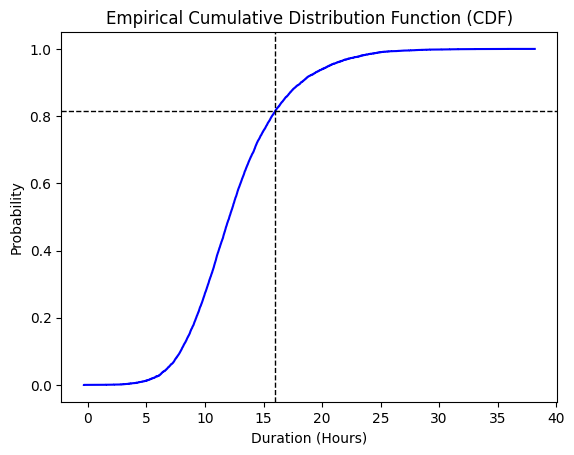

In [121]:

#plt.step( 'x', 'L_n', data=data, color='red')
#plt.step( 'x', 'U_n', data=data, color='green')
plt.step( 'x', 'F_n', data=data, color='blue')
plt.axvline(16, color='k', linestyle='--', lw=1)
plt.axhline(0.8152, color='k', linestyle='--', lw=1)
plt.title("Empirical Cumulative Distribution Function (CDF)")
plt.xlabel('Duration (Hours)')
plt.ylabel('Probability')
plt.show()